# Portfolio

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
print(pd)

<module 'pandas' from 'C:\\Anaconda\\Lib\\site-packages\\pandas\\__init__.py'>


In [13]:
ds = pd.read_csv("C:\\Users\\Administrator\\OneDrive\\Dokumente\\Data Science Portfolio\\Data Science\\Analytics-Avengers\\charging_data.csv")

In [14]:
ds.head()

,Unnamed: 0,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,...,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,breitengrad,laengengrad
0,0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,4.6,...,NaN,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,NaN,2017-01-02,49.653064,8.572109
1,1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,NaN,2021-04-27,49.652969,8.554764
2,2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,NaN,2017-11-21,49.658037,8.787881
3,3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,a,2022-04-08,49.663670,8.796830
4,4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,NaN,2022-04-08,49.646360,8.781410


In [15]:
ds.tail()

,Unnamed: 0,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,...,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,breitengrad,laengengrad
36765,36765,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,NaN,2016-06-01,51.301227,12.384566
36766,36766,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,NaN,2016-06-01,51.311695,12.372912
36767,36767,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,NaN,2018-07-05,51.305046,12.382487
36768,36768,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,NaN,2019-08-12,51.314325,12.397213
36769,36769,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,22.0,AC Kupplung Typ 2,AC Kupplung Typ 2,NaN,NaN,11.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Eichendorffstraße,11,"Parkplatz Fitnessstudio, Zuganskarte notwendig",2022-04-13,51.314364,12.374747


In [17]:
ds.shape

(36770, 22)

In [18]:
print(ds.isnull().sum())

Unnamed: 0                    0
betreiber                     0
art_der_ladeeinrichung        0
anzahl_ladepunkte             0
anschlussleistung             0
steckertypen1                 0
steckertypen2              5659
steckertypen3             34537
steckertypen4             35638
p1_kw                         0
p2_kw                      5641
p3_kw                     34537
p4_kw                     35639
kreis_kreisfreie_stadt        0
ort                           0
postleitzahl                  0
strasse                       0
hausnummer                    0
adresszusatz              32147
inbetriebnahmedatum           0
breitengrad                   0
laengengrad                   0
dtype: int64


<Axes: >

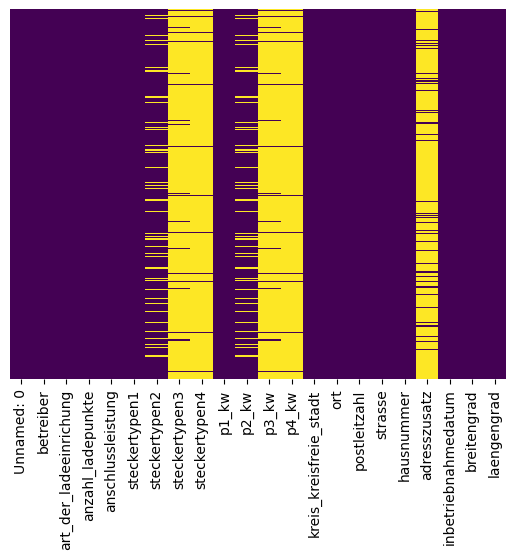

In [19]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36770 entries, 0 to 36769
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              36770 non-null  int64  
 1   betreiber               36770 non-null  object 
 2   art_der_ladeeinrichung  36770 non-null  object 
 3   anzahl_ladepunkte       36770 non-null  int64  
 4   anschlussleistung       36770 non-null  float64
 5   steckertypen1           36770 non-null  object 
 6   steckertypen2           31111 non-null  object 
 7   steckertypen3           2233 non-null   object 
 8   steckertypen4           1132 non-null   object 
 9   p1_kw                   36770 non-null  float64
 10  p2_kw                   31129 non-null  float64
 11  p3_kw                   2233 non-null   float64
 12  p4_kw                   1131 non-null   float64
 13  kreis_kreisfreie_stadt  36770 non-null  object 
 14  ort                     36770 non-null

In [21]:
ds.describe()

,Unnamed: 0,anzahl_ladepunkte,anschlussleistung,p1_kw,p2_kw,p3_kw,p4_kw,postleitzahl,breitengrad,laengengrad
count,36770.000000,36770.000000,36770.000000,36770.000000,31129.000000,2233.000000,1131.000000,36770.000000,36770.000000,36770.000000
mean,18384.500000,1.938075,53.879393,37.648928,38.365378,32.406879,26.196729,54564.223117,50.562816,9.751840
std,10614.729036,0.550034,64.178987,58.958237,58.080733,40.314259,39.295098,27390.091752,1.828351,2.026769
min,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.300000,1062.000000,47.284400,5.243745
25%,9192.250000,2.000000,22.000000,22.000000,22.000000,22.000000,22.000000,31137.000000,48.833821,8.249386
50%,18384.500000,2.000000,44.000000,22.000000,22.000000,22.000000,22.000000,56357.000000,50.661428,9.470774
75%,27576.750000,2.000000,44.000000,22.000000,22.000000,22.000000,22.000000,79117.000000,51.992060,11.462498
max,36769.000000,4.000000,1200.000000,360.000000,360.000000,360.000000,360.000000,99991.000000,55.019600,15.543810


In [26]:
ds_clean = ds.drop(columns=['adresszusatz'])
ds_clean = ds.dropna()

In [27]:
#Analyse über alle Spalten
ds_clean.describe(include='all')

,Unnamed: 0,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,...,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,breitengrad,laengengrad
count,204.000000,204,204,204.0,204.000000,204,204,204,204,204.000000,...,204.000000,204,204,204.000000,204,204,204,204,204.000000,204.000000
unique,NaN,96,2,NaN,NaN,7,8,8,8,NaN,...,NaN,111,147,NaN,179,75,191,154,NaN,NaN
top,NaN,Mer Germany GmbH,Normalladeeinrichtung,NaN,NaN,AC Steckdose Typ 2,AC Steckdose Typ 2,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,...,NaN,Landkreis Freyung-Grafenau,Osnabrück,NaN,Bahnhofstraße,0,Parkplatz,2022-03-01,NaN,NaN
freq,NaN,46,178,NaN,NaN,146,131,151,142,NaN,...,NaN,11,8,NaN,6,26,6,6,NaN,NaN
mean,17210.534314,NaN,NaN,4.0,73.118137,NaN,NaN,NaN,NaN,35.245588,...,26.397059,NaN,NaN,63292.475490,NaN,NaN,NaN,NaN,50.140618,10.452535
std,9727.777196,NaN,NaN,0.0,130.622696,NaN,NaN,NaN,NaN,54.705966,...,42.098736,NaN,NaN,28386.025553,NaN,NaN,NaN,NaN,1.937435,1.994965
min,288.000000,NaN,NaN,4.0,3.700000,NaN,NaN,NaN,NaN,3.700000,...,2.300000,NaN,NaN,1069.000000,NaN,NaN,NaN,NaN,47.456397,6.151764
25%,8547.750000,NaN,NaN,4.0,22.000000,NaN,NaN,NaN,NaN,22.000000,...,11.000000,NaN,NaN,39405.750000,NaN,NaN,NaN,NaN,48.702867,8.807922
50%,15735.000000,NaN,NaN,4.0,44.000000,NaN,NaN,NaN,NaN,22.000000,...,22.000000,NaN,NaN,73687.000000,NaN,NaN,NaN,NaN,49.271839,10.483442
75%,25238.500000,NaN,NaN,4.0,88.000000,NaN,NaN,NaN,NaN,22.000000,...,22.000000,NaN,NaN,86359.000000,NaN,NaN,NaN,NaN,51.842815,12.245940
